In [1]:
import cv2
import sys
import pytesseract

In [2]:
from scipy import ndimage

In [3]:
import matplotlib.pyplot as plt

In [4]:
img=cv2.imread('Indian-Number-Plate-Recognition-System-master/testData/test7.jpg')
#img=cv2.imread('Indian-Number-Plate-Recognition-System-master/testData/test.jpeg')

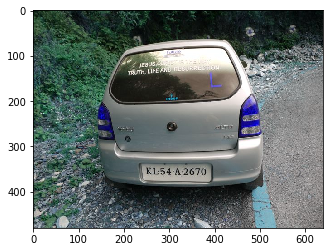

In [5]:
plt.imshow(img)

In [6]:
gaussblur = cv2.GaussianBlur(img,(5,5),0)

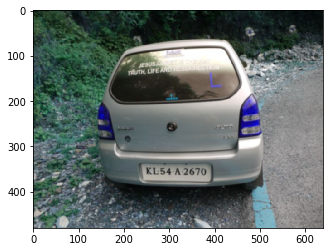

In [7]:
plt.imshow(gaussblur)

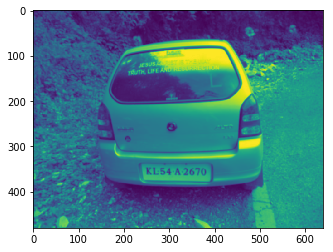

In [8]:
img_gray = cv2.cvtColor(gaussblur,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

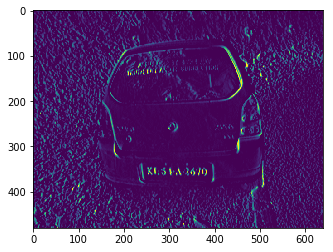

In [9]:
sobelx = cv2.Sobel(img_gray,cv2.CV_8U,1,0,ksize=3)
plt.imshow(sobelx)

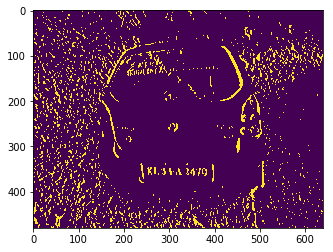

In [10]:
ret2,threshold_img = cv2.threshold(sobelx,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(threshold_img)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


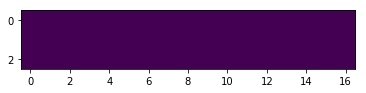

In [11]:
element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(17, 3))
print(element)
plt.imshow(element)

In [12]:
morph_img_threshold = threshold_img.copy()
cv2.morphologyEx(src=threshold_img, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)
im2,contours, hierarchy= cv2.findContours(morph_img_threshold,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)

In [13]:
import numpy as np
from PIL import Image
import pytesseract as tess

In [14]:
def ratioCheck(area, width, height):
	ratio = float(width) / float(height)
	if ratio < 1:
		ratio = 1 / ratio
	aspect = 4.7272
	min = 15*aspect*15  # minimum area
	max = 125*aspect*125  # maximum area
	rmin = 3
	rmax = 6
	if (area < min or area > max) or (ratio < rmin or ratio > rmax):
		return False
	return True

def isMaxWhite(plate):
	avg = np.mean(plate)
    #print(avg)
	if(avg>=100):
		return True
	else:
 		return False

def validateRotationAndRatio(rect):
	(x, y), (width, height), rect_angle = rect

	if(width>height):
		angle = -rect_angle
	else:
		angle = 90 + rect_angle

	if angle>15:
	 	return False

	if height == 0 or width == 0:
		return False

	area = height*width
	if not ratioCheck(area,width,height):
		return False
	else:
		return True
def cleanPlate(plate):
	print "CLEANING PLATE. . ."
	gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
	#kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
	#thresh= cv2.dilate(gray, kernel, iterations=1)

	_, thresh = cv2.threshold(gray, 130, 255, cv2.THRESH_BINARY)
	im1,contours,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

	if contours:
		areas = [cv2.contourArea(c) for c in contours]
		max_index = np.argmax(areas)

		max_cnt = contours[max_index]
		max_cntArea = areas[max_index]
		x,y,w,h = cv2.boundingRect(max_cnt)

		if not ratioCheck(max_cntArea,w,h):
			return plate,None

		cleaned_final = thresh[y:y+h, x:x+w]
		#cv2.imshow("Function Test",cleaned_final)
		return cleaned_final,[x,y,w,h]

	else:
		return plate,None


CLEANING PLATE. . .
Detected Text :  
CLEANING PLATE. . .
Detected Text :  | KL54-A2670"

ja


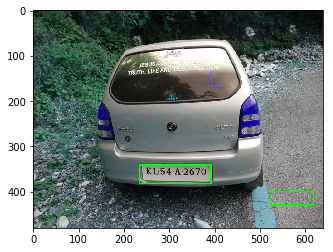

In [16]:
for i,cnt in enumerate(contours):
    min_rect = cv2.minAreaRect(cnt)
    if validateRotationAndRatio(min_rect):
        x,y,w,h = cv2.boundingRect(cnt)
        plate_img = img[y:y+h,x:x+w]
        plimg=plate_img
        kernels = np.ones((1,1), np.uint8)
        #print("Checkpint 1")
        #dilation = cv2.dilate(plate_img,kernels,iterations = 1)
        img_erosion = cv2.erode(plate_img, kernel=kernels, iterations=1)
        #print("Checkpint 2")
        if(isMaxWhite(img_erosion)):
            #print("Checkpint 3")
            clean_plate, rect = cleanPlate(img_erosion)
            if rect:
                x1,y1,w1,h1 = rect
                x,y,w,h = x+x1,y+y1,w1,h1#Imshow
                #print("Checkpint 4")
                plate_im = Image.fromarray(clean_plate)#cv2.imshow("Cleaned Plate",clean_plate)
                #print("Checkpint 5")
                text = tess.image_to_string(plate_im, lang='eng')
                #print("Checkpint 6")
                if text !=' ':
                    print "Detected Text : ",text
                img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
                #cv2.imshow("Detected Plate",img)
                plt.imshow(img)#cv2.waitKey(0)

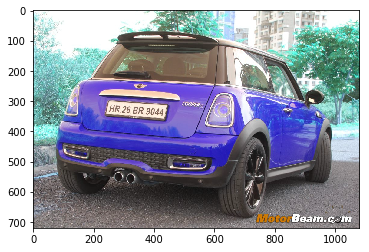

In [17]:
img2=cv2.imread('Indian-Number-Plate-Recognition-System-master/testData/test4.jpg')
plt.imshow(img2)

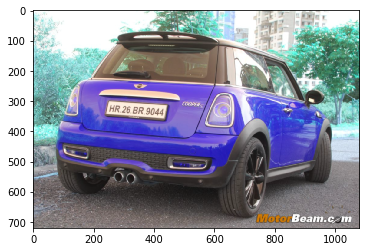

In [18]:
gaussblur = cv2.GaussianBlur(img2,(5,5),0)
plt.imshow(gaussblur)

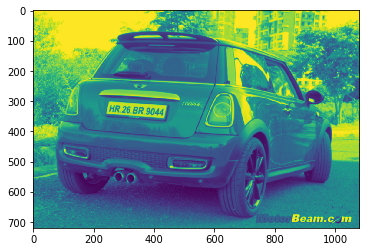

In [19]:
img_gray = cv2.cvtColor(gaussblur,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

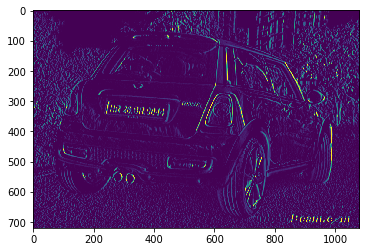

In [20]:
sobelxx = cv2.Sobel(img_gray,cv2.CV_8U,1,0,ksize=3)
plt.imshow(sobelxx)

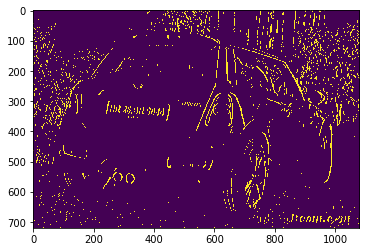

In [21]:
ret2,threshold_img = cv2.threshold(sobelxx,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(threshold_img)

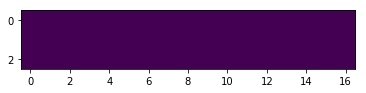

In [22]:
element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(17, 3))
plt.imshow(element)

In [23]:
morph_img_threshold = threshold_img.copy()
cv2.morphologyEx(src=threshold_img, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)
im2,contours, hierarchy= cv2.findContours(morph_img_threshold,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)

In [24]:
import numpy as np
from PIL import Image
import pytesseract as tess

CLEANING PLATE. . .
Detected Text :  [HR 26 BR 9044]

eee
CLEANING PLATE. . .
Detected Text :  


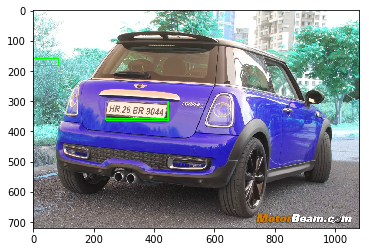

In [26]:
for i,cnt in enumerate(contours):
    min_rect = cv2.minAreaRect(cnt)
    if validateRotationAndRatio(min_rect):
        x,y,w,h = cv2.boundingRect(cnt)
        plate_img = img2[y:y+h,x:x+w]
        plimg=plate_img
        kernels = np.ones((1,1), np.uint8)
        #print("Checkpint 1")
        #dilation = cv2.dilate(plate_img,kernels,iterations = 1)
        img_erosion = cv2.erode(plate_img, kernel=kernels, iterations=1)
        #print("Checkpint 2")
        if(isMaxWhite(img_erosion)):
            #print("Checkpint 3")
            clean_plate, rect = cleanPlate(img_erosion)
            if rect:
                x1,y1,w1,h1 = rect
                x,y,w,h = x+x1,y+y1,w1,h1#Imshow
                #print("Checkpint 4")
                plate_im = Image.fromarray(clean_plate)#cv2.imshow("Cleaned Plate",clean_plate)
                #print("Checkpint 5")
                text = tess.image_to_string(plate_im, lang='eng')
                #print("Checkpint 6")
                if text !=' ':
                    print "Detected Text : ",text
                img = cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),2)
                #cv2.imshow("Detected Plate",img)
                plt.imshow(img)#cv2.waitKey(0)